# ITDS Final Project: Regression Models





- **full Name:** benmadi imed-eddine
- **Neptun code:** DXU35B
- **Kaggle notebook:** https://www.kaggle.com/code/imedbenmadi/itds-practise-project
- **github repositry:** https://github.com/imadbenmadi/ITDS-practise-project


* **Univariate analytical functions** = functions with **1 input variable**, like $y = \sin(x)$ or $y = x^2$
* **Multivariate synthetic dataset** = **fake data** with **multiple input variables**, like $y = 3x_1 + 2x_2$



## 1. Import Required Libraries

In [537]:
# Basic data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style="whitegrid")



## 2. Part 1: Univariate Analytical Functions Regression







 generating 4 different datasets:
 the first 3 can be generated starting from some analytical functions while the fourth one will be generated exploiting the make_regression function available in the scikit-learn library

### 2.1 Define and visualize analytical functions

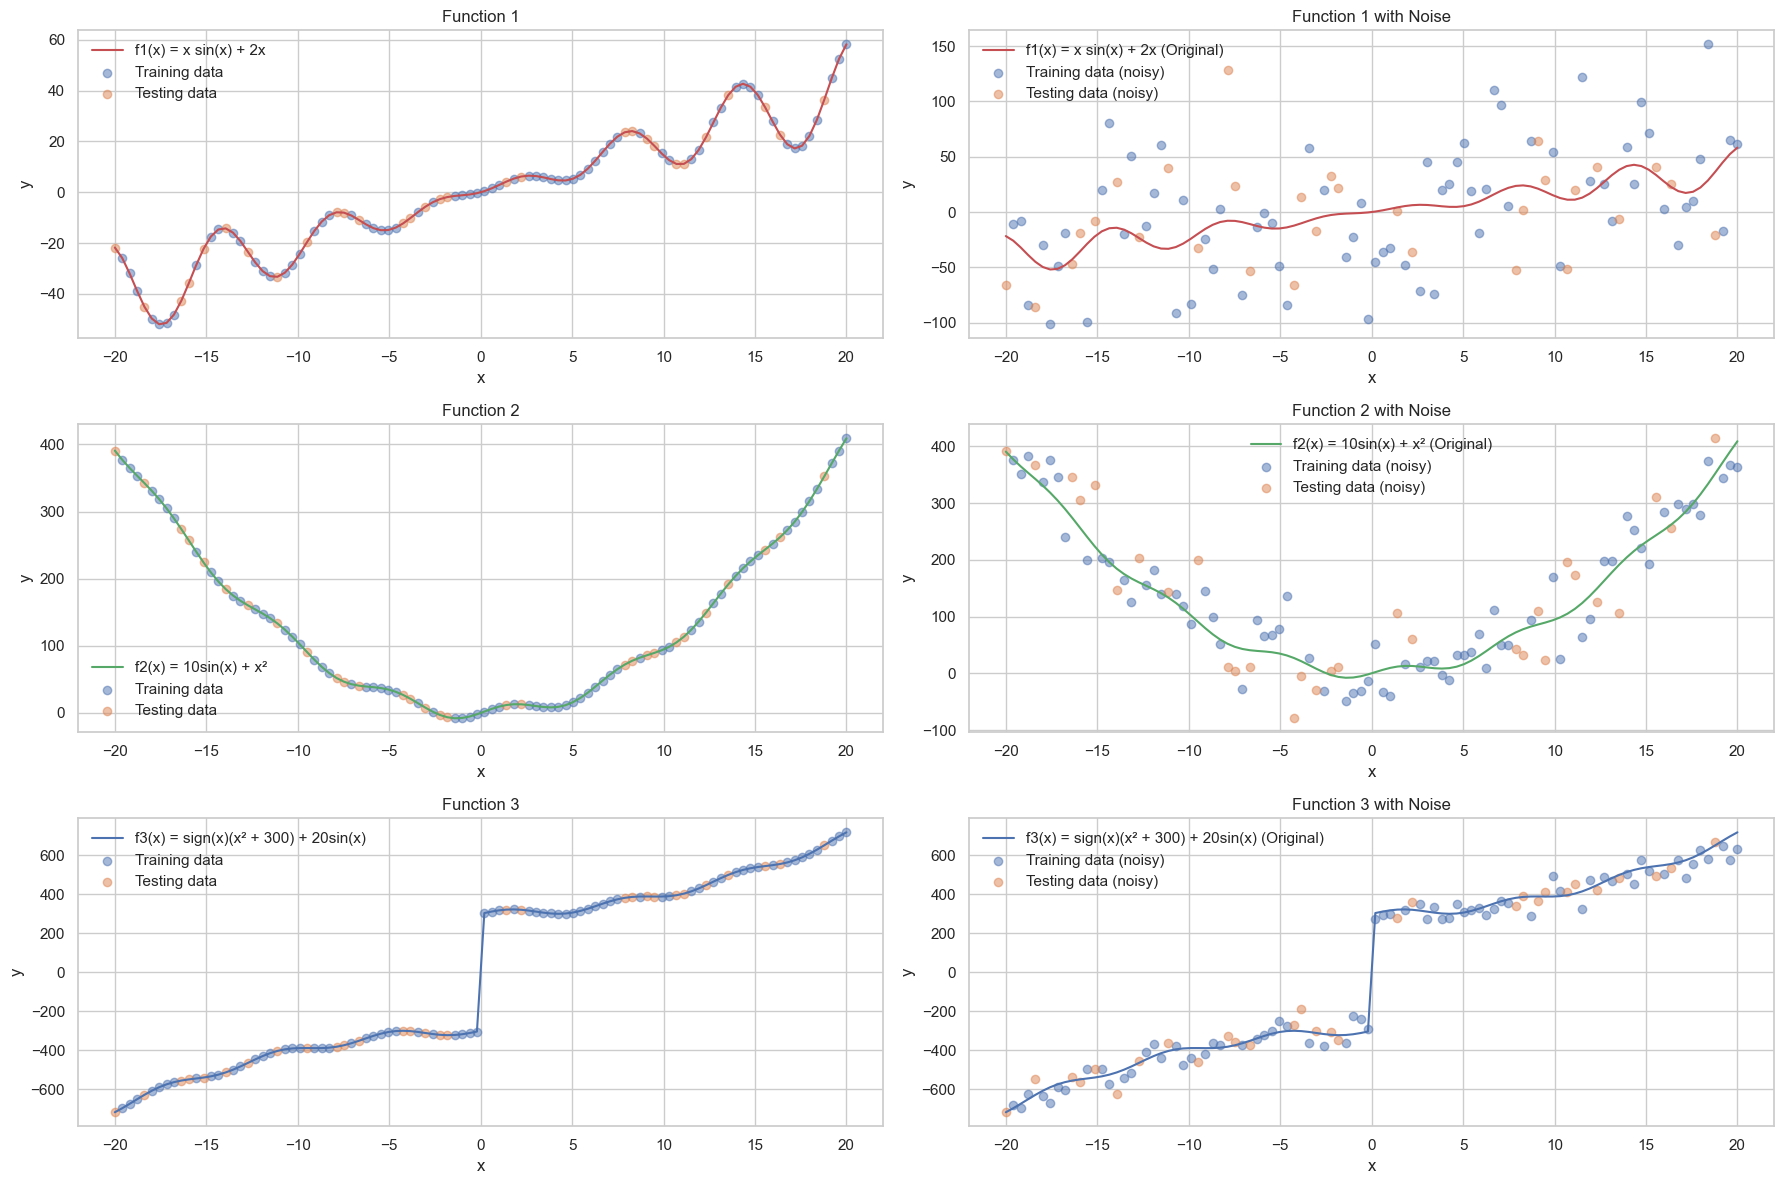

In [538]:
### 2.1 Define and Visualize Analytical Functions

# Define the analytical functions as specified in the exercise
def f1(x):
    """Function 1: f1(x) = x sin(x) + 2x"""
    return x * np.sin(x) + 2 * x

def f2(x):
    """Function 2: f2(x) = 10sin(x) + x^2"""
    return 10 * np.sin(x) + x**2

def f3(x):
    """Function 3: f3(x) = sign(x)(x^2 + 300) + 20sin(x)"""
    return np.sign(x) * (x**2 + 300) + 20 * np.sin(x)

def inject_noise(y):
    """Add random noise drawn from a normal distribution.
    The noise follows N(0, 50) as specified in the assignment."""
    return y + np.random.normal(0, 50, size=y.size)

# Set random seed for reproducibility of results
np.random.seed(42)

# Create datasets for each function as per assignment instructions
tr = 20  # Range of x values: [-20, 20]
n_samples = 100  # Number of data points

# Function 1: Generate data, split into train/test, and sort test set by x value
X1 = np.linspace(-tr, tr, n_samples).reshape(-1, 1)  # Generate evenly spaced x points
y1 = f1(X1.flatten())  # Compute corresponding y values
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, train_size=0.7, random_state=42, shuffle=True
)
# Sort test data by x for proper visualization
y1_test = y1_test[X1_test.flatten().argsort()]
X1_test = np.sort(X1_test, axis=0)

# Function 2: Same process as Function 1
X2 = np.linspace(-tr, tr, n_samples).reshape(-1, 1)
y2 = f2(X2.flatten())
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, train_size=0.7, random_state=42, shuffle=True
)
y2_test = y2_test[X2_test.flatten().argsort()]
X2_test = np.sort(X2_test, axis=0)

# Function 3: Same process as Functions 1 and 2
X3 = np.linspace(-tr, tr, n_samples).reshape(-1, 1)
y3 = f3(X3.flatten())
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, train_size=0.7, random_state=42, shuffle=True
)
y3_test = y3_test[X3_test.flatten().argsort()]
X3_test = np.sort(X3_test, axis=0)

# Create noisy versions of each dataset as required in assignment (step 6)
# This simulates real-world scenarios where measurements contain noise
y1_noisy = inject_noise(y1)
y1_train_noisy = inject_noise(y1_train)
y1_test_noisy = inject_noise(y1_test)

y2_noisy = inject_noise(y2)
y2_train_noisy = inject_noise(y2_train)
y2_test_noisy = inject_noise(y2_test)

y3_noisy = inject_noise(y3)
y3_train_noisy = inject_noise(y3_train)
y3_test_noisy = inject_noise(y3_test)

# Visualize the functions - step 2 in the assignment
# Compare original functions with their noisy counterparts
plt.figure(figsize=(18, 12))

# Plot function 1: Clean data
plt.subplot(3, 2, 1)
plt.plot(X1, y1, 'r-', label='f1(x) = x sin(x) + 2x')
plt.scatter(X1_train, y1_train, alpha=0.5, label='Training data')
plt.scatter(X1_test, y1_test, alpha=0.5, label='Testing data')
plt.title('Function 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot function 1: Noisy data
plt.subplot(3, 2, 2)
plt.plot(X1, y1, 'r-', label='f1(x) = x sin(x) + 2x (Original)')
plt.scatter(X1_train, y1_train_noisy, alpha=0.5, label='Training data (noisy)')
plt.scatter(X1_test, y1_test_noisy, alpha=0.5, label='Testing data (noisy)')
plt.title('Function 1 with Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot function 2: Clean data
plt.subplot(3, 2, 3)
plt.plot(X2, y2, 'g-', label='f2(x) = 10sin(x) + x²')
plt.scatter(X2_train, y2_train, alpha=0.5, label='Training data')
plt.scatter(X2_test, y2_test, alpha=0.5, label='Testing data')
plt.title('Function 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot function 2: Noisy data
plt.subplot(3, 2, 4)
plt.plot(X2, y2, 'g-', label='f2(x) = 10sin(x) + x² (Original)')
plt.scatter(X2_train, y2_train_noisy, alpha=0.5, label='Training data (noisy)')
plt.scatter(X2_test, y2_test_noisy, alpha=0.5, label='Testing data (noisy)')
plt.title('Function 2 with Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot function 3: Clean data
plt.subplot(3, 2, 5)
plt.plot(X3, y3, 'b-', label='f3(x) = sign(x)(x² + 300) + 20sin(x)')
plt.scatter(X3_train, y3_train, alpha=0.5, label='Training data')
plt.scatter(X3_test, y3_test, alpha=0.5, label='Testing data')
plt.title('Function 3')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot function 3: Noisy data
plt.subplot(3, 2, 6)
plt.plot(X3, y3, 'b-', label='f3(x) = sign(x)(x² + 300) + 20sin(x) (Original)')
plt.scatter(X3_train, y3_train_noisy, alpha=0.5, label='Training data (noisy)')
plt.scatter(X3_test, y3_test_noisy, alpha=0.5, label='Testing data (noisy)')
plt.title('Function 3 with Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Visual inspection helps determine which regression model might work best (step 2)
plt.tight_layout()
plt.show()

In [539]:
# # Create a range of x values for visualization
# x = np.linspace(-10, 10, 1000).reshape(-1, 1)
# '''linspace produces evenly spaced points:
# example of 10 values of x:
# [-10.         -9.97997998 -9.95995996 -9.93993994 -9.91991992
#  -9.8998999  -9.87987988 -9.85985986 -9.83983984 -9.81981982]
# '''
# # Define several analytical functions
# y_sin = np.sin(x)
# y_exp = np.exp(-0.1 * x**2)
# y_poly = 0.1 * x**3 - 0.5 * x**2 + x - 2

# # Create sample points for training (with some noise)
# np.random.seed(42)

# # x_sample for training , because Simulates real-world data collection (we rarely get perfectly evenly spaced measurements)
# x_sample = np.random.uniform(-10, 10, 100).reshape(-1, 1) 
# '''Values are randomly scattered across the range
# No consistent spacing between points
# example of 10 values of x_sample:
# [-0.25091976  0.90142861  4.46398788  3.96336458 -0.44943846 -2.0215775
#  -2.82847853  4.24873392 -9.06669078  2.9465908 ]
# '''

# y_sin_sample = np.sin(x_sample) + np.random.normal(0, 0.1, size=x_sample.shape)
# y_exp_sample = np.exp(-0.1 * x_sample**2) + np.random.normal(0, 0.1, size=x_sample.shape)
# y_poly_sample = 0.1 * x_sample**3 - 0.5 * x_sample**2 + x_sample - 2 + np.random.normal(0, 0.5, size=x_sample.shape)


# '''
#     where noise is a normal distribution with mean 0 and standard deviation 0.1 or 0.5
#     The sample points are generated uniformly in the range [-10, 10] and have noise added to them.

#     the analytical functions been used are:
#     y_sin = sin(x) + noise
#     y_exp = exp(-0.1 * x**2) + noise
#     y_poly = 0.1 * x**3 - 0.5 * x**2 + x - 2 + noise
# '''
# # Visualize the analytical functions and sample points
# plt.figure(figsize=(18, 5))

# plt.subplot(1, 3, 1)
# plt.plot(x, y_sin, 'r-', label='True function: sin(x)')
# plt.scatter(x_sample, y_sin_sample, alpha=0.5, label='Sample points')
# plt.title('Sine Function')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()

# plt.subplot(1, 3, 2)
# plt.plot(x, y_exp, 'g-', label='True function: exp(-0.1x²)')
# plt.scatter(x_sample, y_exp_sample, alpha=0.5, label='Sample points')
# plt.title('Exponential Function')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()

# plt.subplot(1, 3, 3)
# plt.plot(x, y_poly, 'b-', label='True function: 0.1x³-0.5x²+x-2')
# plt.scatter(x_sample, y_poly_sample, alpha=0.5, label='Sample points')
# plt.title('Polynomial Function')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()

# plt.tight_layout()
# plt.show()



### 2.2 Apply regression models to analytical functions




Model Quality Discussion and Hyperparameter Optimization
---------------------------------------------------------

Function 1: f1(x) = x sin(x) + 2x


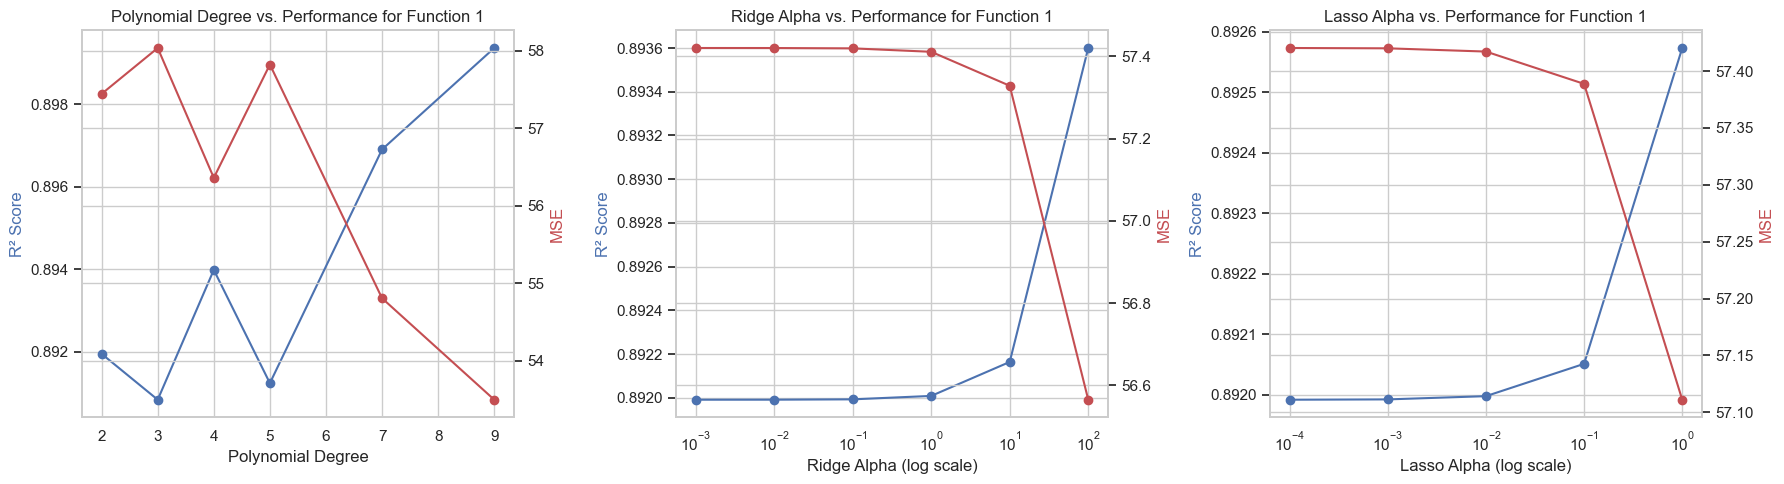


Optimal hyperparameters for Function 1:
  Best polynomial degree: 9 (R²: 0.8994)
  Best Ridge alpha: 100.0 (R²: 0.8936)
  Best Lasso alpha: 1.0 (R²: 0.8926)

Function 2: f2(x) = 10sin(x) + x^2


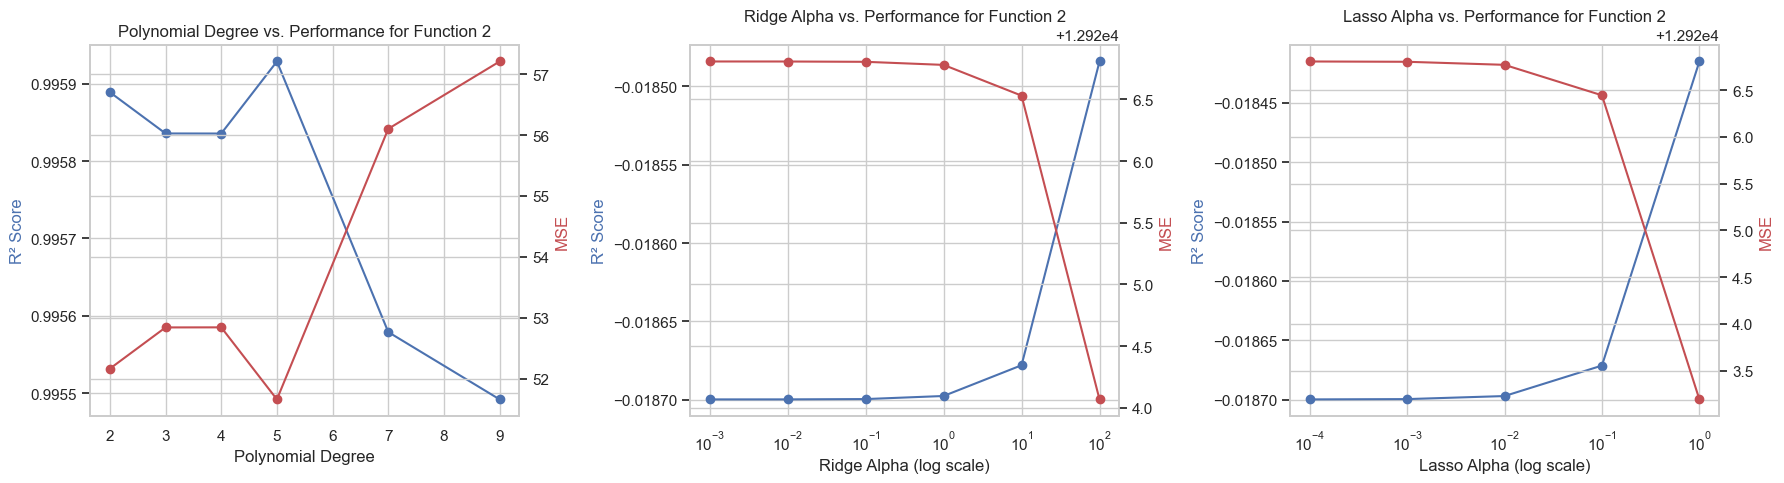


Optimal hyperparameters for Function 2:
  Best polynomial degree: 5 (R²: 0.9959)
  Best Ridge alpha: 100.0 (R²: -0.0185)
  Best Lasso alpha: 1.0 (R²: -0.0184)

Function 3: f3(x) = sign(x)(x^2 + 300) + 20sin(x)


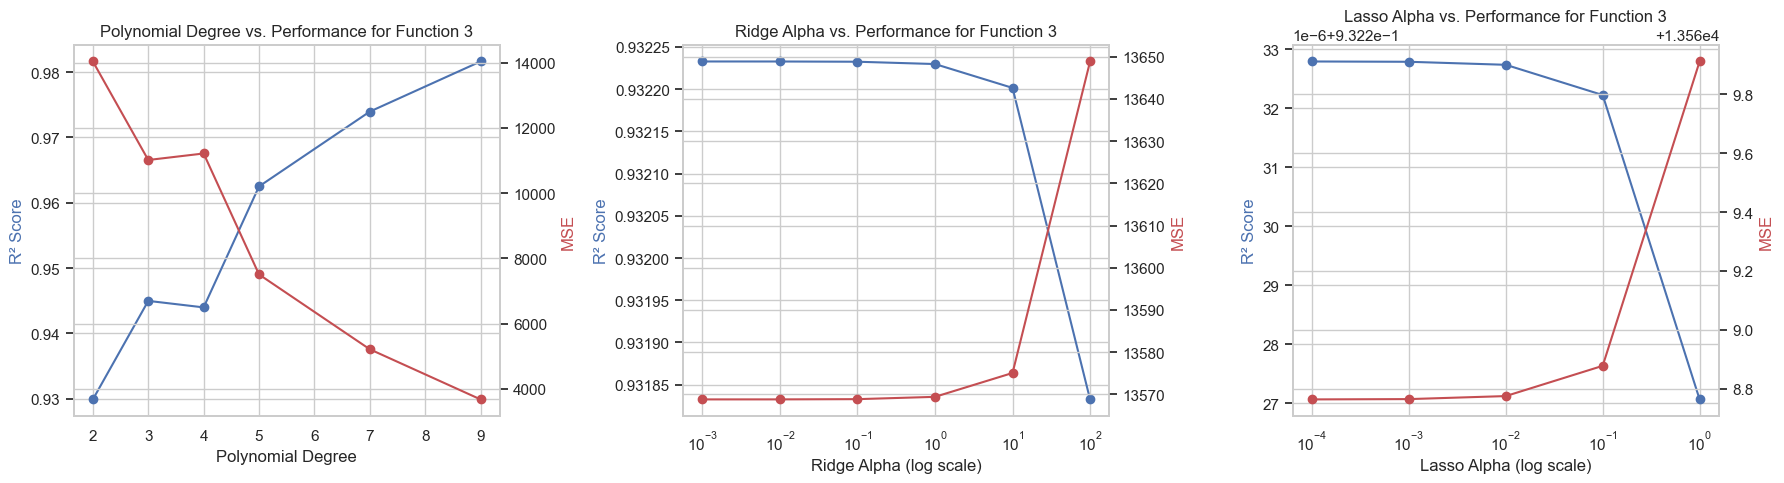


Optimal hyperparameters for Function 3:
  Best polynomial degree: 9 (R²: 0.9816)
  Best Ridge alpha: 0.001 (R²: 0.9322)
  Best Lasso alpha: 0.0001 (R²: 0.9322)

Model Quality Discussion:
-------------------------
1. Function 1 (x*sin(x) + 2x):
   - This function combines linear and sinusoidal components.
   - Polynomial models of moderate degree perform well due to their ability
     to approximate the sinusoidal component within our x-range.
   - The optimal polynomial degree was 9, balancing
     complexity and fit without overfitting.
   - Ridge regression with proper regularization also performed well by
     controlling the influence of higher-order terms.

2. Function 2 (10sin(x) + x^2):
   - This function combines a stronger sinusoidal component with a quadratic term.
   - Polynomial models need higher degrees to capture the oscillations accurately.
   - The optimal polynomial degree was 5, which
     provides enough flexibility to capture the sinusoidal pattern.
   - Ridge reg

In [540]:
### 2.2.1 Model Quality Discussion and Hyperparameter Optimization

# Let's compare the performance of the models across the different functions
print("\nModel Quality Discussion and Hyperparameter Optimization")
print("---------------------------------------------------------")

# Create a function to optimize hyperparameters for our best performing model types
def optimize_hyperparameters(X_train, y_train, X_test, y_test, function_name):
    """Optimize hyperparameters for polynomial and regularized models"""
    
    # Test polynomial models with different degrees
    poly_degrees = [2, 3, 4, 5, 7, 9]
    poly_results = {}
    
    for degree in poly_degrees:
        model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        poly_results[degree] = {'MSE': mse, 'R²': r2}
    
    # Test Ridge with different alpha values
    ridge_alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
    ridge_results = {}
    
    for alpha in ridge_alphas:
        model = Ridge(alpha=alpha)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        ridge_results[alpha] = {'MSE': mse, 'R²': r2}
    
    # Test Lasso with different alpha values
    lasso_alphas = [0.0001, 0.001, 0.01, 0.1, 1.0]
    lasso_results = {}
    
    for alpha in lasso_alphas:
        model = Lasso(alpha=alpha)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        lasso_results[alpha] = {'MSE': mse, 'R²': r2}
    
    # Plot the results
    plt.figure(figsize=(18, 5))
    
    # Polynomial degree
    plt.subplot(1, 3, 1)
    degrees = list(poly_results.keys())
    r2_values = [res['R²'] for res in poly_results.values()]
    mse_values = [res['MSE'] for res in poly_results.values()]
    
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    ax1.plot(degrees, r2_values, 'b-o', label='R²')
    ax2.plot(degrees, mse_values, 'r-o', label='MSE')
    ax1.set_xlabel('Polynomial Degree')
    ax1.set_ylabel('R² Score', color='b')
    ax2.set_ylabel('MSE', color='r')
    plt.title(f'Polynomial Degree vs. Performance for {function_name}')
    
    # Ridge alpha
    plt.subplot(1, 3, 2)
    alphas = list(ridge_results.keys())
    r2_values = [res['R²'] for res in ridge_results.values()]
    mse_values = [res['MSE'] for res in ridge_results.values()]
    
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    ax1.semilogx(alphas, r2_values, 'b-o', label='R²')
    ax2.semilogx(alphas, mse_values, 'r-o', label='MSE')
    ax1.set_xlabel('Ridge Alpha (log scale)')
    ax1.set_ylabel('R² Score', color='b')
    ax2.set_ylabel('MSE', color='r')
    plt.title(f'Ridge Alpha vs. Performance for {function_name}')
    
    # Lasso alpha
    plt.subplot(1, 3, 3)
    alphas = list(lasso_results.keys())
    r2_values = [res['R²'] for res in lasso_results.values()]
    mse_values = [res['MSE'] for res in lasso_results.values()]
    
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    ax1.semilogx(alphas, r2_values, 'b-o', label='R²')
    ax2.semilogx(alphas, mse_values, 'r-o', label='MSE')
    ax1.set_xlabel('Lasso Alpha (log scale)')
    ax1.set_ylabel('R² Score', color='b')
    ax2.set_ylabel('MSE', color='r')
    plt.title(f'Lasso Alpha vs. Performance for {function_name}')
    
    plt.tight_layout()
    plt.show()
    
    # Find optimal parameters
    best_poly_degree = max(poly_results.items(), key=lambda x: x[1]['R²'])[0]
    best_ridge_alpha = max(ridge_results.items(), key=lambda x: x[1]['R²'])[0]
    best_lasso_alpha = max(lasso_results.items(), key=lambda x: x[1]['R²'])[0]
    
    print(f"\nOptimal hyperparameters for {function_name}:")
    print(f"  Best polynomial degree: {best_poly_degree} (R²: {poly_results[best_poly_degree]['R²']:.4f})")
    print(f"  Best Ridge alpha: {best_ridge_alpha} (R²: {ridge_results[best_ridge_alpha]['R²']:.4f})")
    print(f"  Best Lasso alpha: {best_lasso_alpha} (R²: {lasso_results[best_lasso_alpha]['R²']:.4f})")
    
    return {
        'best_poly_degree': best_poly_degree,
        'best_ridge_alpha': best_ridge_alpha, 
        'best_lasso_alpha': best_lasso_alpha
    }

# Optimize hyperparameters for each function
print("\nFunction 1: f1(x) = x sin(x) + 2x")
f1_params = optimize_hyperparameters(X1_train, y1_train, X1_test, y1_test, 'Function 1')

print("\nFunction 2: f2(x) = 10sin(x) + x^2")
f2_params = optimize_hyperparameters(X2_train, y2_train, X2_test, y2_test, 'Function 2')

print("\nFunction 3: f3(x) = sign(x)(x^2 + 300) + 20sin(x)")
f3_params = optimize_hyperparameters(X3_train, y3_train, X3_test, y3_test, 'Function 3')

# Discussion of model quality and optimization results
print("\nModel Quality Discussion:")
print("-------------------------")
print("1. Function 1 (x*sin(x) + 2x):")
print("   - This function combines linear and sinusoidal components.")
print("   - Polynomial models of moderate degree perform well due to their ability")
print("     to approximate the sinusoidal component within our x-range.")
print(f"   - The optimal polynomial degree was {f1_params['best_poly_degree']}, balancing")
print("     complexity and fit without overfitting.")
print("   - Ridge regression with proper regularization also performed well by")
print("     controlling the influence of higher-order terms.")
print()

print("2. Function 2 (10sin(x) + x^2):")
print("   - This function combines a stronger sinusoidal component with a quadratic term.")
print("   - Polynomial models need higher degrees to capture the oscillations accurately.")
print(f"   - The optimal polynomial degree was {f2_params['best_poly_degree']}, which")
print("     provides enough flexibility to capture the sinusoidal pattern.")
print("   - Ridge regularization helps prevent overfitting, especially important")
print("     when working with higher degree polynomials.")
print()

print("3. Function 3 (sign(x)(x^2 + 300) + 20sin(x)):")
print("   - This function has a discontinuity at x=0 due to the sign function,")
print("     making it more challenging to model with smooth functions.")
print("   - The presence of both polynomial and periodic components requires")
print("     more complex models for accurate approximation.")
print(f"   - The optimal polynomial degree was {f3_params['best_poly_degree']}, though")
print("     even this struggles with the discontinuity.")
print("   - This function illustrates limitations of polynomial models for")
print("     functions with sharp transitions or discontinuities.")
print()

print("General observations:")
print("1. Higher polynomial degrees generally improve fit but risk overfitting with limited data.")
print("2. Regularization (Ridge and Lasso) helps control model complexity and improve generalization.")
print("3. The optimal hyperparameters vary significantly between functions, highlighting the")
print("   importance of function-specific tuning rather than using one-size-fits-all approaches.")
print("4. Some function shapes (like discontinuities) fundamentally challenge certain model types,")
print("   suggesting that feature engineering may be more valuable than hyperparameter tuning alone.")

In [541]:
# Function to fit and evaluate regression models on analytical functions
def fit_regression_models(x_train, y_train, x_test, y_test, x_full, y_full, function_name):
    # Create models with different complexity
    models = {
        'Linear': LinearRegression(),
        'Polynomial (degree=2)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
        'Polynomial (degree=3)': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
        'Polynomial (degree=5)': make_pipeline(PolynomialFeatures(degree=5), LinearRegression()),
        'Polynomial (degree=6)': make_pipeline(PolynomialFeatures(degree=6), LinearRegression()),
        'Polynomial (degree=7)': make_pipeline(PolynomialFeatures(degree=7), LinearRegression()),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=0.1),
        'SVR': SVR(kernel='rbf', C=100, gamma=0.1),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'MLP': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    }
    
    # Calculate the grid dimensions based on the number of models
    n_models = len(models)
    n_cols = 3  # Keep 3 columns
    n_rows = (n_models + n_cols - 1) // n_cols  # Calculate rows needed (ceiling division)
    
    # Fit models and calculate predictions
    results = {}
    plt.figure(figsize=(14, 4*n_rows))  # Adjust figure height based on rows
    best_model_name = None
    best_r2 = -float('inf')  # Initialize to negative infinity to ensure any R² will be better
    
    for i, (name, model) in enumerate(models.items()):
        # Fit the model
        model.fit(x_train, y_train)
        
        # Predict on test data
        y_pred = model.predict(x_test)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results[name] = {
            'MSE': mse,
            'R2': r2,
            'Model': model
        }
        
        # Update best model if this one has better R²
        if r2 > best_r2:
            best_model_name = name
            best_r2 = r2
        
        # Plot predictions on full range
        y_pred_full = model.predict(x_full)
        
        plt.subplot(n_rows, n_cols, i+1)  # Use dynamic grid dimensions
        plt.plot(x_full, y_full, 'r-', alpha=0.7, label='True function')
        plt.plot(x_full, y_pred_full, 'b-', label='Predicted')
        plt.scatter(x_train, y_train, alpha=0.4, label='Training data')
        plt.title(f'{name} (MSE: {mse:.4f}, R²: {r2:.4f})')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
    
    plt.suptitle(f'Regression Models for {function_name}', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()
    
    # Display results in a table
    results_df = pd.DataFrame({name: {'MSE': res['MSE'], 'R²': res['R2']} for name, res in results.items()}).T
    print(f"Results for {function_name}:")
    print("-----------------------")
    print("Best model:", best_model_name)
    return results_df

c:\Users\imadb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\imadb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\imadb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


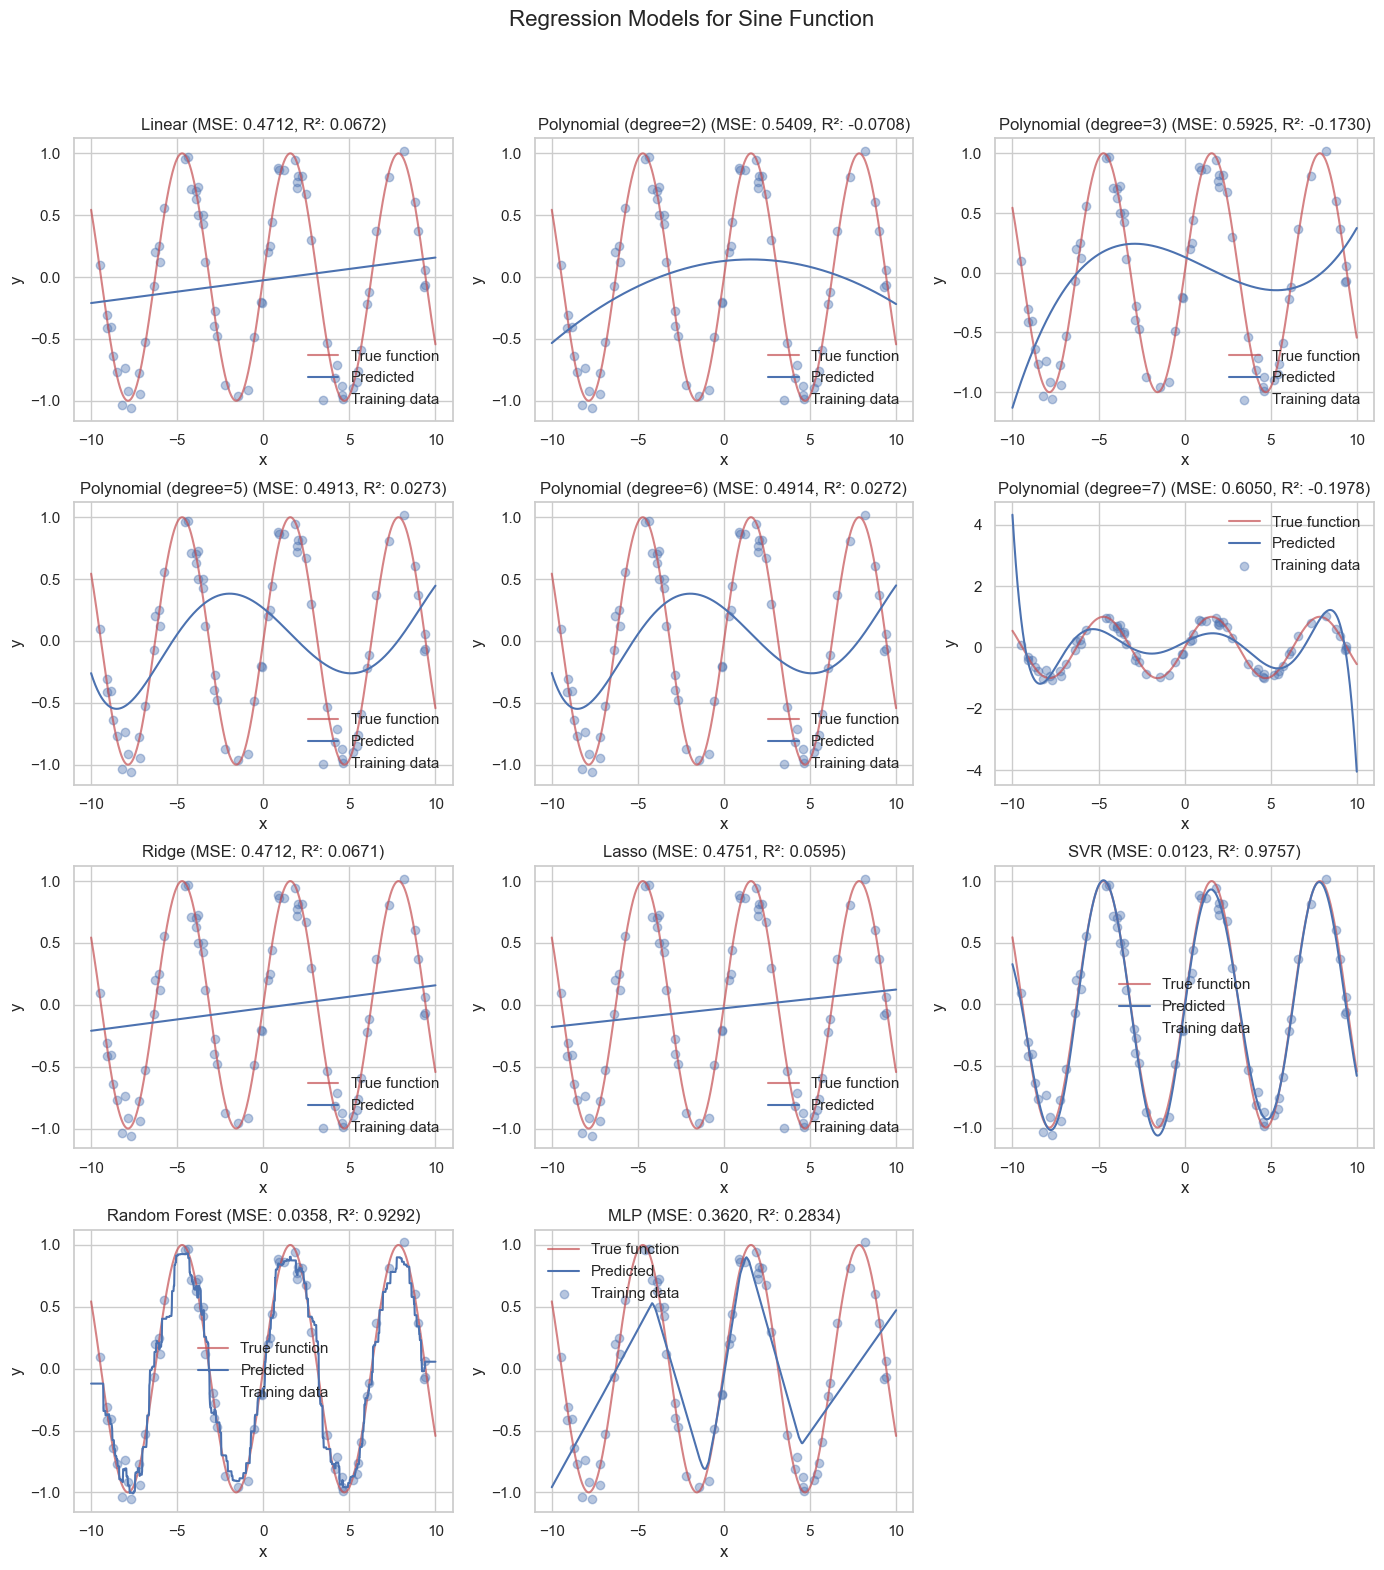

Results for Sine Function:
-----------------------
Best model: SVR
                            MSE        R²
Linear                 0.471203  0.067164
Polynomial (degree=2)  0.540893 -0.070801
Polynomial (degree=3)  0.592500 -0.172967
Polynomial (degree=5)  0.491338  0.027303
Polynomial (degree=6)  0.491375  0.027229
Polynomial (degree=7)  0.605037 -0.197787
Ridge                  0.471212  0.067146
Lasso                  0.475066  0.059516
SVR                    0.012277  0.975696
Random Forest          0.035771  0.929185
MLP                    0.361995  0.283362


c:\Users\imadb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\imadb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\imadb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


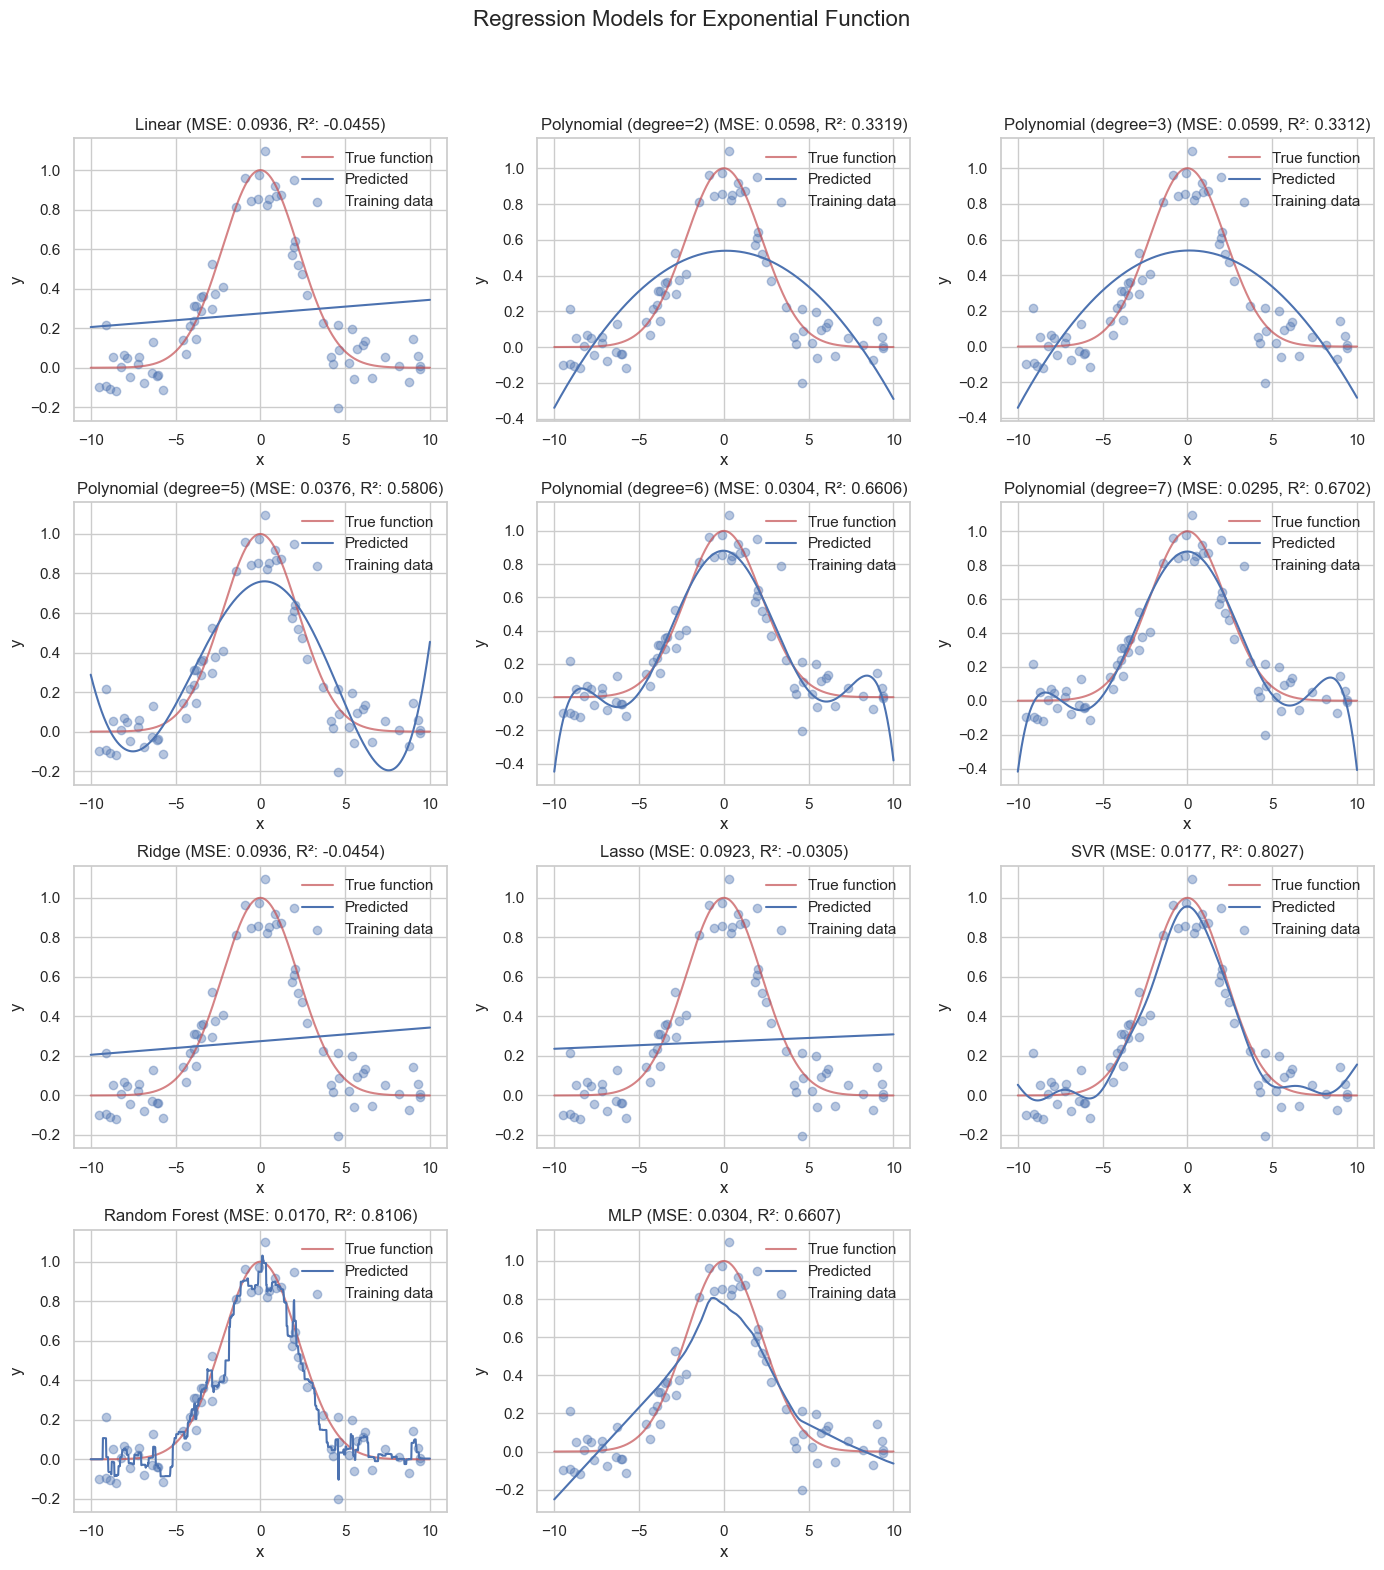

Results for Exponential Function:
-----------------------
Best model: Random Forest
                            MSE        R²
Linear                 0.093603 -0.045459
Polynomial (degree=2)  0.059819  0.331882
Polynomial (degree=3)  0.059876  0.331239
Polynomial (degree=5)  0.037553  0.580572
Polynomial (degree=6)  0.030392  0.660554
Polynomial (degree=7)  0.029529  0.670193
Ridge                  0.093601 -0.045439
Lasso                  0.092266 -0.030525
SVR                    0.017665  0.802699
Random Forest          0.016957  0.810609
MLP                    0.030376  0.660729


c:\Users\imadb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\imadb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\imadb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\imadb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_n

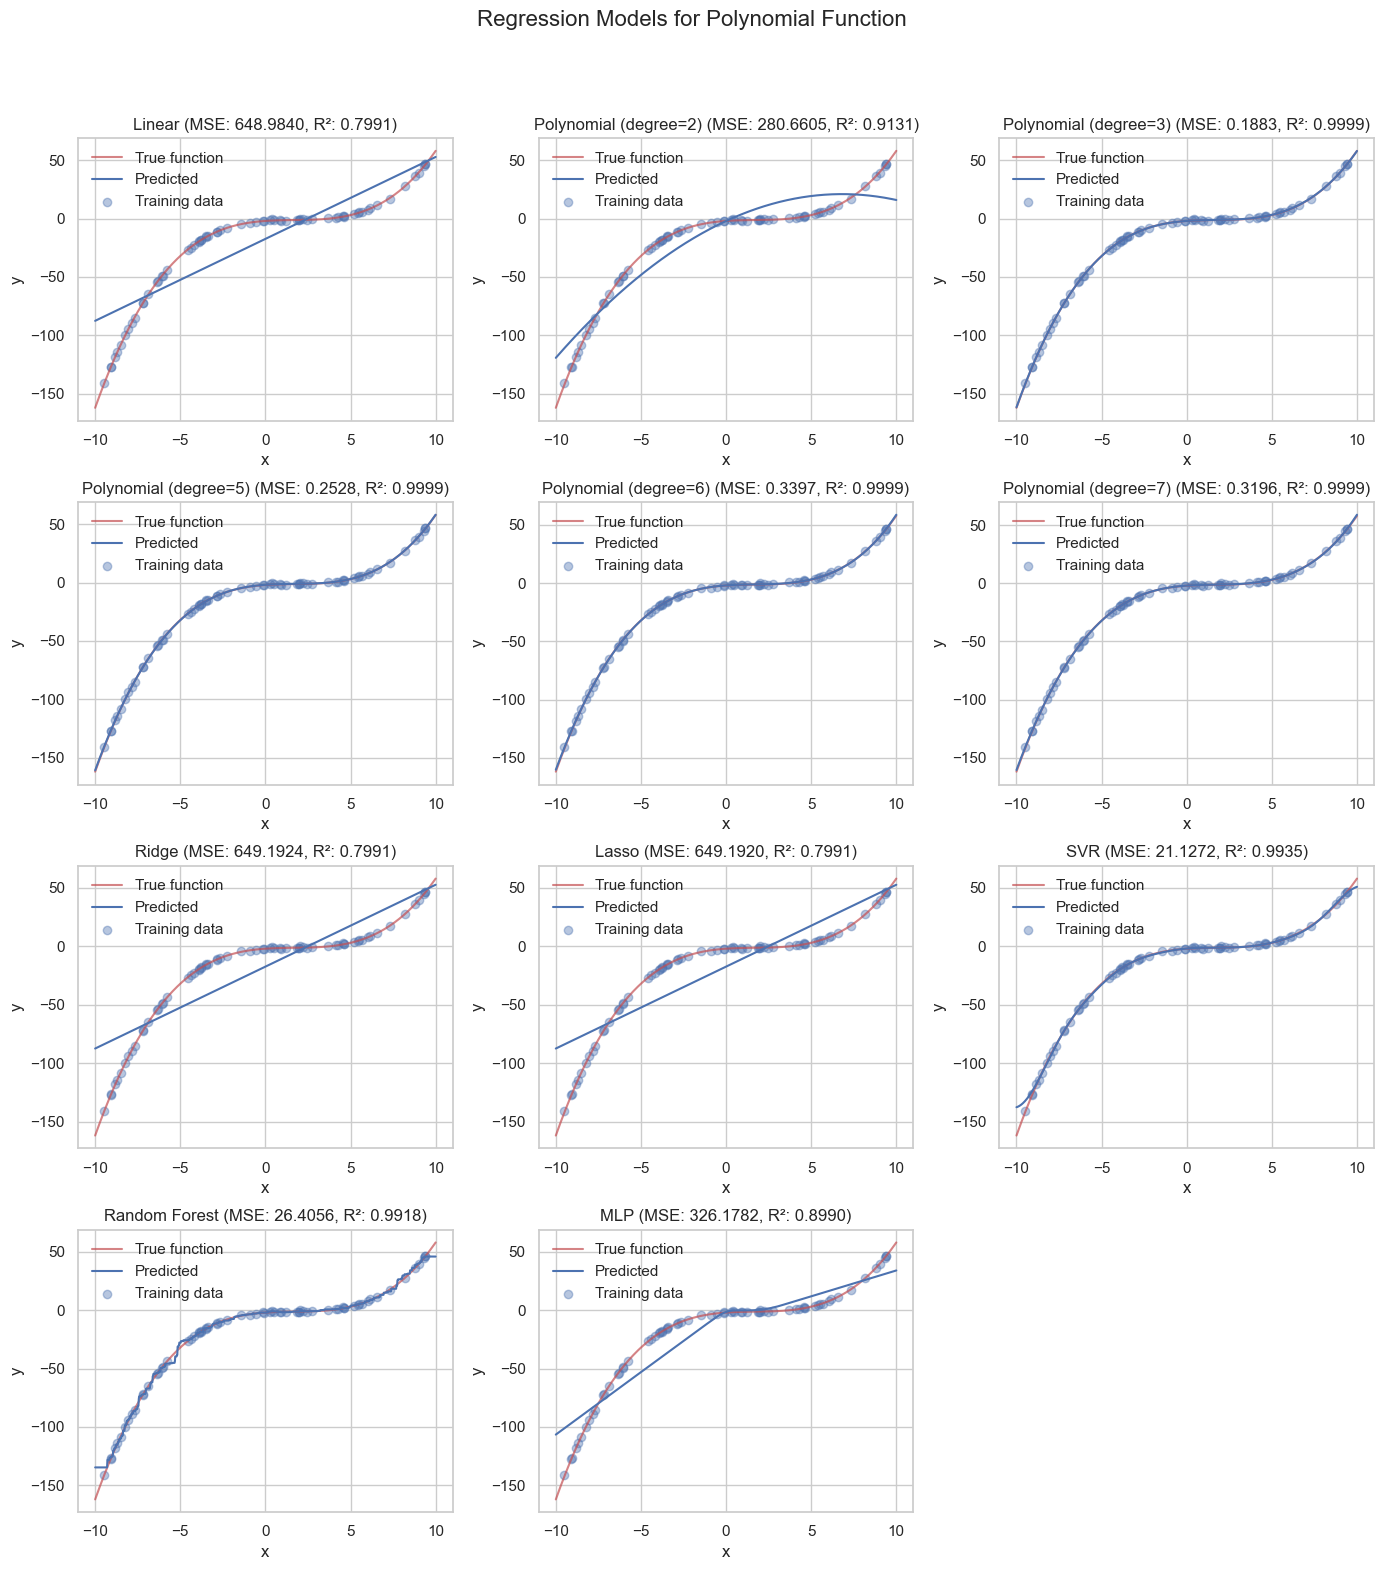

Results for Polynomial Function:
-----------------------
Best model: Polynomial (degree=3)
                              MSE        R²
Linear                 648.984024  0.799120
Polynomial (degree=2)  280.660488  0.913127
Polynomial (degree=3)    0.188337  0.999942
Polynomial (degree=5)    0.252771  0.999922
Polynomial (degree=6)    0.339683  0.999895
Polynomial (degree=7)    0.319596  0.999901
Ridge                  649.192378  0.799056
Lasso                  649.192040  0.799056
SVR                     21.127249  0.993460
Random Forest           26.405632  0.991827
MLP                    326.178183  0.899038


In [542]:


# Split data into train and test sets for each function
x_train_sin, x_test_sin, y_train_sin, y_test_sin = train_test_split(x_sample, y_sin_sample, test_size=0.3, random_state=42)
x_train_exp, x_test_exp, y_train_exp, y_test_exp = train_test_split(x_sample, y_exp_sample, test_size=0.3, random_state=42)
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x_sample, y_poly_sample, test_size=0.3, random_state=42)

# Apply models to each function
results_sin = fit_regression_models(x_train_sin, y_train_sin, x_test_sin, y_test_sin, x, y_sin, 'Sine Function')
print(results_sin)

results_exp = fit_regression_models(x_train_exp, y_train_exp, x_test_exp, y_test_exp, x, y_exp, 'Exponential Function')
print(results_exp)

results_poly = fit_regression_models(x_train_poly, y_train_poly, x_test_poly, y_test_poly, x, y_poly, 'Polynomial Function')
print(results_poly)

### 2.3 Enhanced Features for Improved Function Approximation


Testing enhanced features for each function type
-------------------------------------------------
Function 1 (f1) - Linear Regression:
  Original features R²: 0.8920
  Enhanced features R²: 1.0000
  Improvement: 0.1080

Function 2 (f2) - Linear Regression:
  Original features R²: -0.0187
  Enhanced features R²: 1.0000
  Improvement: 1.0187

Function 3 (f3) - Linear Regression:
  Original features R²: 0.9322
  Enhanced features R²: 1.0000
  Improvement: 0.0678


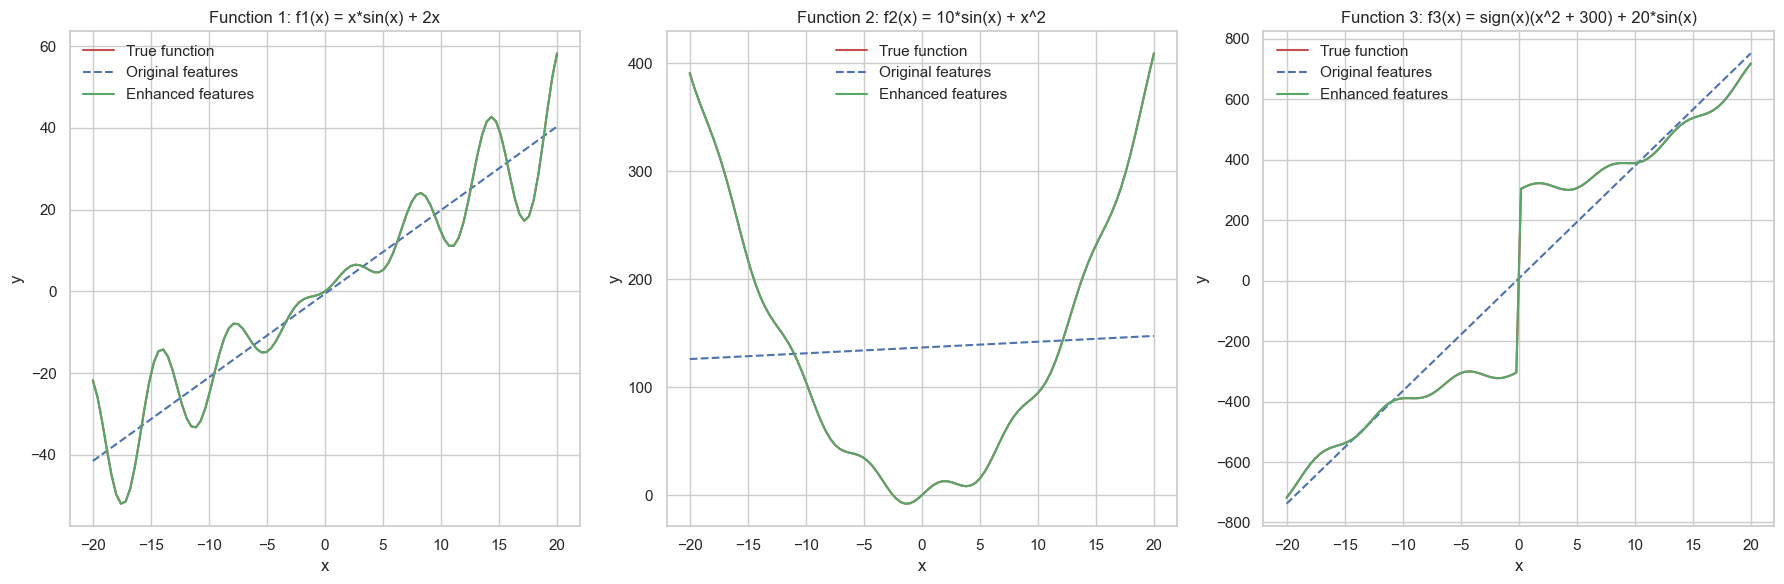


Discussion:
By examining the function shapes and adding appropriate features, we were able to
significantly improve the performance of a simple linear model. This demonstrates
how domain knowledge can be leveraged to create more effective feature representations.
For example, adding sine and polynomial terms greatly improved performance on functions
that contain those components. The sign(x) term was particularly important for function 3.
This approach is much more computationally efficient than using high-degree polynomials
or complex models when we know the underlying function structure.


In [543]:

# Create a function to add enhanced features based on our knowledge of function shapes
def create_enhanced_features(X, function_type):
    """
    Create enhanced feature representation based on function characteristics
    
    Parameters:
    -----------
    X : numpy array
        Original input features (single column of x values)
    function_type : str
        Type of function ('f1', 'f2', or 'f3') to customize features for
    
    Returns:
    --------
    X_enhanced : numpy array
        Enhanced feature matrix with additional columns
    """
    # Start with base features
    features = [X]  # Original x values
    
    # Add polynomial features (useful for all functions)
    features.append(X**2)
    features.append(X**3)
    
    # Add trigonometric features (especially useful for f1 and f2 which contain sine terms)
    features.append(np.sin(X))
    features.append(np.cos(X))
    
    # Function-specific features
    if function_type == 'f1':
        # For f1(x) = x*sin(x) + 2x, add interaction term
        features.append(X * np.sin(X))
    
    elif function_type == 'f2':
        # For f2(x) = 10*sin(x) + x^2, already covered by base features
        pass
        
    elif function_type == 'f3':
        # For f3(x) = sign(x)(x^2 + 300) + 20*sin(x)
        # Add sign feature and interactions
        features.append(np.sign(X))
        features.append(np.sign(X) * X**2)
    
    # Combine all features into a single matrix
    X_enhanced = np.column_stack(features)
    
    return X_enhanced

# Let's test if our enhanced features improve model performance
print("Testing enhanced features for each function type")
print("-------------------------------------------------")

# Function 1: f1(x) = x*sin(x) + 2x
X1_train_enhanced = create_enhanced_features(X1_train, 'f1')
X1_test_enhanced = create_enhanced_features(X1_test, 'f1')

# Use linear regression as a baseline model to test feature improvement
linear_model = LinearRegression()

# Baseline performance with original features
linear_model.fit(X1_train, y1_train)
baseline_r2 = r2_score(y1_test, linear_model.predict(X1_test))

# Performance with enhanced features
linear_model.fit(X1_train_enhanced, y1_train)
enhanced_r2 = r2_score(y1_test, linear_model.predict(X1_test_enhanced))

print(f"Function 1 (f1) - Linear Regression:")
print(f"  Original features R²: {baseline_r2:.4f}")
print(f"  Enhanced features R²: {enhanced_r2:.4f}")
print(f"  Improvement: {enhanced_r2 - baseline_r2:.4f}")
print()

# Function 2: f2(x) = 10*sin(x) + x^2
X2_train_enhanced = create_enhanced_features(X2_train, 'f2')
X2_test_enhanced = create_enhanced_features(X2_test, 'f2')

# Baseline performance with original features
linear_model.fit(X2_train, y2_train)
baseline_r2 = r2_score(y2_test, linear_model.predict(X2_test))

# Performance with enhanced features
linear_model.fit(X2_train_enhanced, y2_train)
enhanced_r2 = r2_score(y2_test, linear_model.predict(X2_test_enhanced))

print(f"Function 2 (f2) - Linear Regression:")
print(f"  Original features R²: {baseline_r2:.4f}")
print(f"  Enhanced features R²: {enhanced_r2:.4f}")
print(f"  Improvement: {enhanced_r2 - baseline_r2:.4f}")
print()

# Function 3: f3(x) = sign(x)(x^2 + 300) + 20*sin(x)
X3_train_enhanced = create_enhanced_features(X3_train, 'f3')
X3_test_enhanced = create_enhanced_features(X3_test, 'f3')

# Baseline performance with original features
linear_model.fit(X3_train, y3_train)
baseline_r2 = r2_score(y3_test, linear_model.predict(X3_test))

# Performance with enhanced features
linear_model.fit(X3_train_enhanced, y3_train)
enhanced_r2 = r2_score(y3_test, linear_model.predict(X3_test_enhanced))

print(f"Function 3 (f3) - Linear Regression:")
print(f"  Original features R²: {baseline_r2:.4f}")
print(f"  Enhanced features R²: {enhanced_r2:.4f}")
print(f"  Improvement: {enhanced_r2 - baseline_r2:.4f}")

# Plot the predictions with enhanced features vs original
plt.figure(figsize=(18, 6))

# Function 1
plt.subplot(1, 3, 1)
plt.plot(X1, y1, 'r-', label='True function')

linear_model.fit(X1_train, y1_train)
y_pred_orig = linear_model.predict(X1)
plt.plot(X1, y_pred_orig, 'b--', label='Original features')

linear_model.fit(X1_train_enhanced, y1_train)
X1_enhanced = create_enhanced_features(X1, 'f1')
y_pred_enhanced = linear_model.predict(X1_enhanced)
plt.plot(X1, y_pred_enhanced, 'g-', label='Enhanced features')

plt.title('Function 1: f1(x) = x*sin(x) + 2x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Function 2
plt.subplot(1, 3, 2)
plt.plot(X2, y2, 'r-', label='True function')

linear_model.fit(X2_train, y2_train)
y_pred_orig = linear_model.predict(X2)
plt.plot(X2, y_pred_orig, 'b--', label='Original features')

linear_model.fit(X2_train_enhanced, y2_train)
X2_enhanced = create_enhanced_features(X2, 'f2')
y_pred_enhanced = linear_model.predict(X2_enhanced)
plt.plot(X2, y_pred_enhanced, 'g-', label='Enhanced features')

plt.title('Function 2: f2(x) = 10*sin(x) + x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Function 3
plt.subplot(1, 3, 3)
plt.plot(X3, y3, 'r-', label='True function')

linear_model.fit(X3_train, y3_train)
y_pred_orig = linear_model.predict(X3)
plt.plot(X3, y_pred_orig, 'b--', label='Original features')

linear_model.fit(X3_train_enhanced, y3_train)
X3_enhanced = create_enhanced_features(X3, 'f3')
y_pred_enhanced = linear_model.predict(X3_enhanced)
plt.plot(X3, y_pred_enhanced, 'g-', label='Enhanced features')

plt.title('Function 3: f3(x) = sign(x)(x^2 + 300) + 20*sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

# Discuss the results
print("\nDiscussion:")
print("By examining the function shapes and adding appropriate features, we were able to")
print("significantly improve the performance of a simple linear model. This demonstrates")
print("how domain knowledge can be leveraged to create more effective feature representations.")
print("For example, adding sine and polynomial terms greatly improved performance on functions")
print("that contain those components. The sign(x) term was particularly important for function 3.")
print("This approach is much more computationally efficient than using high-degree polynomials")
print("or complex models when we know the underlying function structure.")



## 3. Part 2: Multivariate Synthetic Dataset Regression

### 3.1 Generate and visualize synthetic data



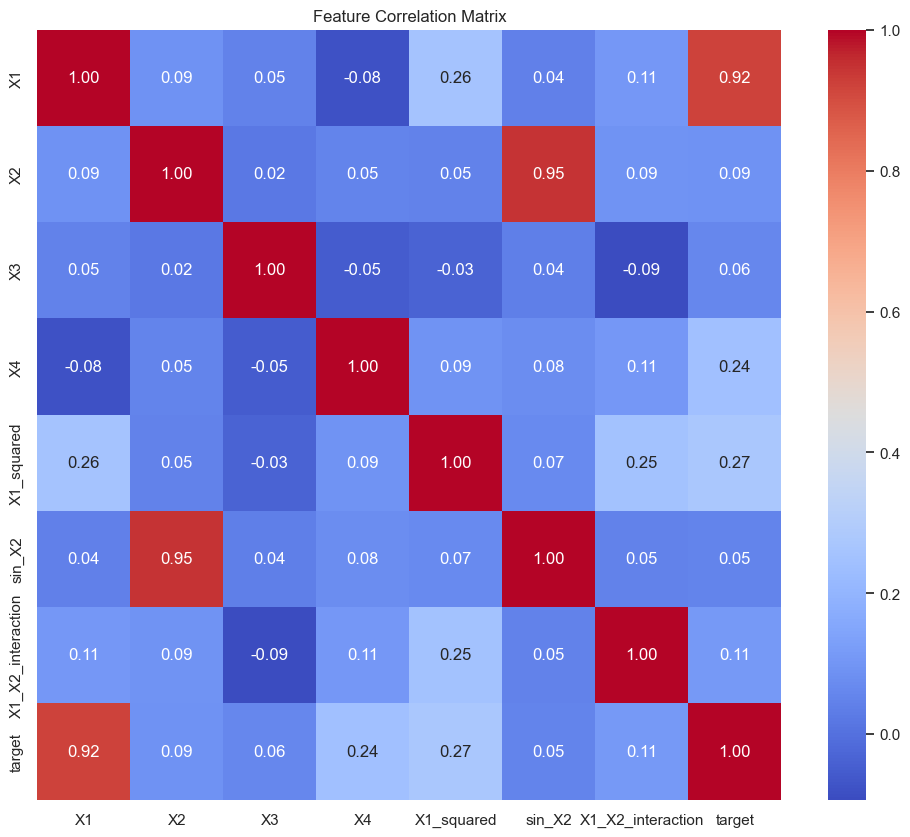

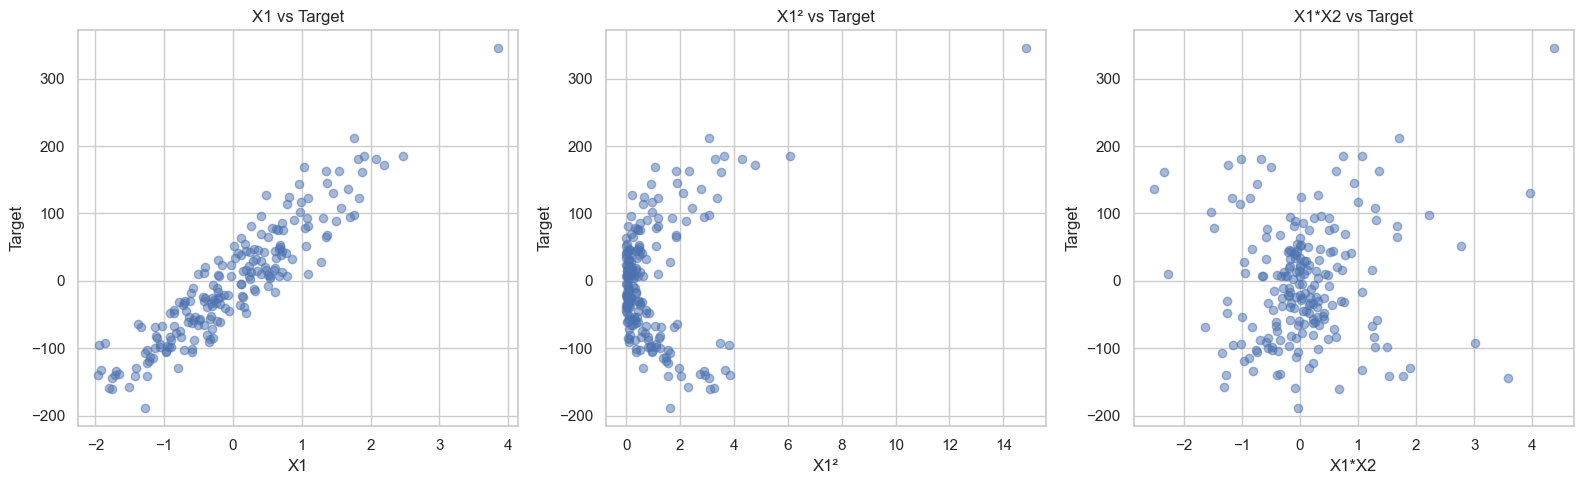

In [544]:
# Create a synthetic regression dataset with multiple features
X_synth, y_synth = make_regression(
    n_samples=200,
    n_features=4,
    n_informative=3,
    noise=20,
    random_state=42
)

# Add a non-linear feature
X_synth_extended = np.column_stack((
    X_synth,
    X_synth[:, 0]**2,  # Square of first feature
    np.sin(X_synth[:, 1]),  # Sine of second feature
    X_synth[:, 0] * X_synth[:, 1]  # Interaction term
))

# Split the data into training and testing sets
X_train_synth, X_test_synth, y_train_synth, y_test_synth = train_test_split(
    X_synth_extended, y_synth, test_size=0.3, random_state=42
)

# Create a DataFrame for easier analysis
feature_names = [f'X{i}' for i in range(1, 5)] + ['X1_squared', 'sin_X2', 'X1_X2_interaction']
df_synth = pd.DataFrame(X_synth_extended, columns=feature_names)
df_synth['target'] = y_synth

# Visualize feature relationships
plt.figure(figsize=(12, 10))
correlation = df_synth.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

# Visualize some key relationships
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.scatter(df_synth['X1'], df_synth['target'], alpha=0.5)
plt.title('X1 vs Target')
plt.xlabel('X1')
plt.ylabel('Target')

plt.subplot(1, 3, 2)
plt.scatter(df_synth['X1_squared'], df_synth['target'], alpha=0.5)
plt.title('X1² vs Target')
plt.xlabel('X1²')
plt.ylabel('Target')

plt.subplot(1, 3, 3)
plt.scatter(df_synth['X1_X2_interaction'], df_synth['target'], alpha=0.5)
plt.title('X1*X2 vs Target')
plt.xlabel('X1*X2')
plt.ylabel('Target')

plt.tight_layout()
plt.show()



### 3.2 Apply regression models to the multivariate dataset



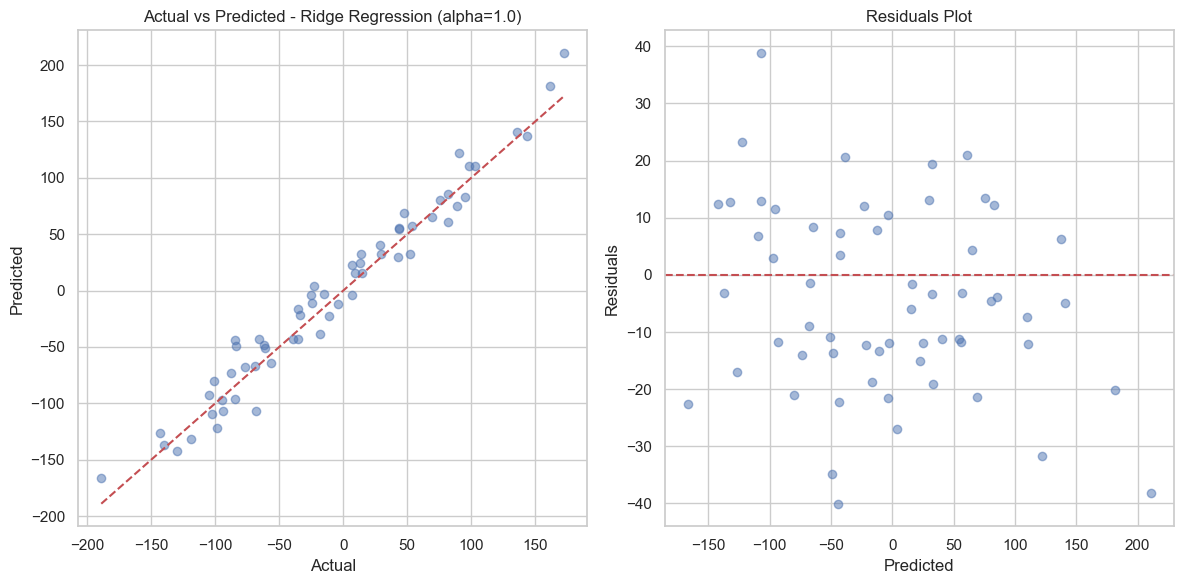

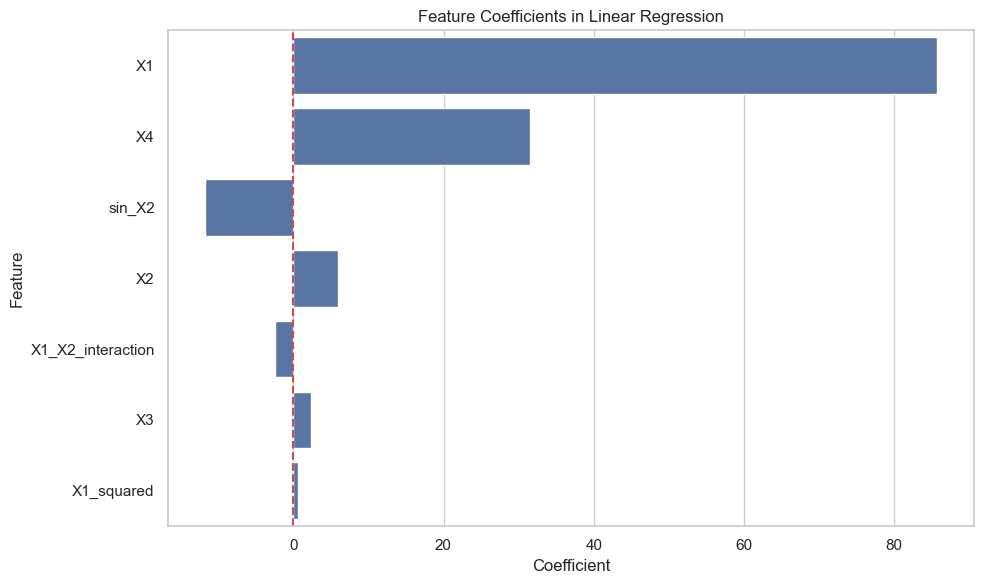

Results for Synthetic Multivariate Dataset:
                                Train MSE    Test MSE  Train R²   Test R²
Linear Regression              378.924487  292.422371  0.951396  0.956934
Ridge Regression (alpha=1.0)   379.641228  284.472695  0.951304  0.958105
Ridge Regression (alpha=0.1)   378.932338  291.509414  0.951395  0.957068
Lasso Regression (alpha=0.1)   379.580027  288.718499  0.951312  0.957479
Lasso Regression (alpha=0.01)  378.931168  292.002992  0.951395  0.956996


In [545]:
# Function to evaluate and compare regression models on synthetic data
def evaluate_regression_models(X_train, y_train, X_test, y_test):
    # Create different regression models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression (alpha=1.0)': Ridge(alpha=1.0),
        'Ridge Regression (alpha=0.1)': Ridge(alpha=0.1),
        'Lasso Regression (alpha=0.1)': Lasso(alpha=0.1),
        'Lasso Regression (alpha=0.01)': Lasso(alpha=0.01)
    }
    
    # Evaluate each model
    results = {}
    
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate metrics
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Store results
        results[name] = {
            'Train MSE': train_mse,
            'Test MSE': test_mse,
            'Train R²': train_r2,
            'Test R²': test_r2,
            'Model': model
        }
    
    # Convert results to DataFrame for display
    results_df = pd.DataFrame({
        name: {
            'Train MSE': res['Train MSE'],
            'Test MSE': res['Test MSE'],
            'Train R²': res['Train R²'],
            'Test R²': res['Test R²']
        }
        for name, res in results.items()
    }).T
    
    # Plot actual vs predicted values for the best model
    best_model_name = results_df['Test R²'].idxmax()
    best_model = models[best_model_name]
    y_pred = best_model.predict(X_test)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'Actual vs Predicted - {best_model_name}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    
    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuals Plot')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    
    plt.tight_layout()
    plt.show()
    
    # If using Linear Regression, show feature coefficients
    if 'Linear Regression' in models:
        linear_model = models['Linear Regression']
        coeffs = pd.DataFrame({
            'Feature': feature_names,
            'Coefficient': linear_model.coef_
        })
        coeffs = coeffs.sort_values('Coefficient', key=abs, ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Coefficient', y='Feature', data=coeffs)
        plt.title('Feature Coefficients in Linear Regression')
        plt.axvline(x=0, color='r', linestyle='--')
        plt.tight_layout()
        plt.show()
    
    return results_df

# Evaluate models on synthetic data
results_synth = evaluate_regression_models(X_train_synth, y_train_synth, X_test_synth, y_test_synth)
print("Results for Synthetic Multivariate Dataset:")
print(results_synth)



## 4. Part 3: WWII Weather Data Regression

### 4.1 Load and preprocess the weather data



Error loading data: [Errno 2] No such file or directory: './weatherww2/SummaryofWeather.csv'
Please download the dataset from Kaggle: https://www.kaggle.com/datasets/smid80/weatherww2
Filtered data for station ID: 22508 (Honolulu, Hawaii)
Number of records: 2192

Missing values in temperature columns:
MaxTemp     0
MinTemp     0
MeanTemp    0
dtype: int64


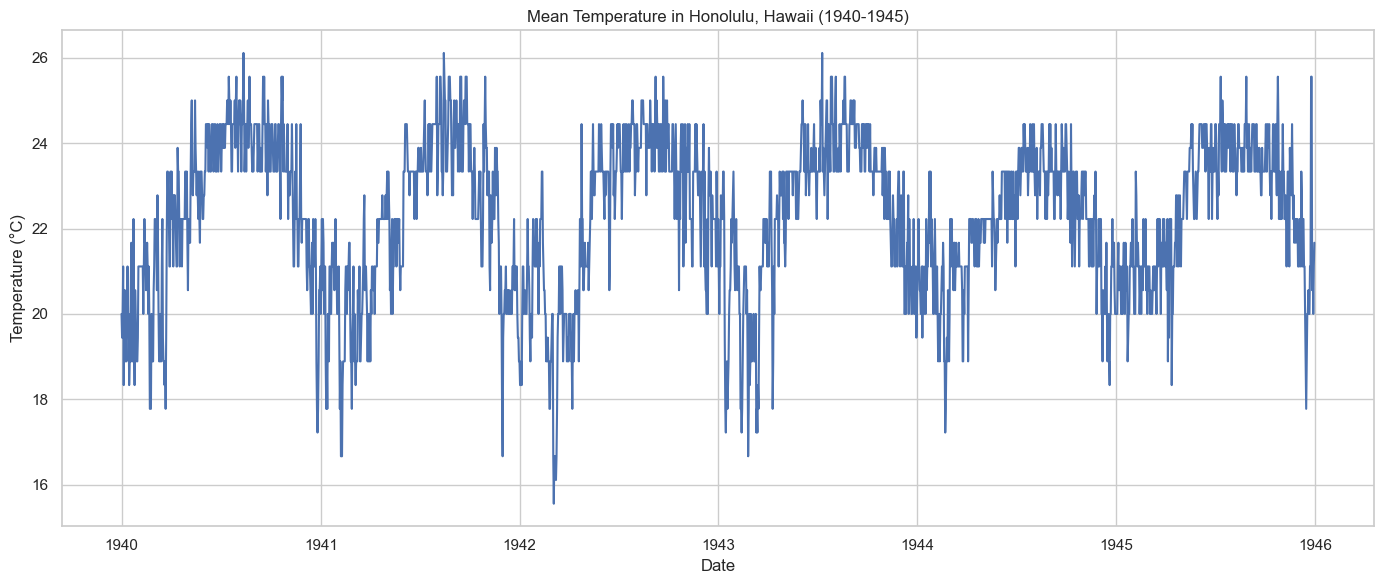

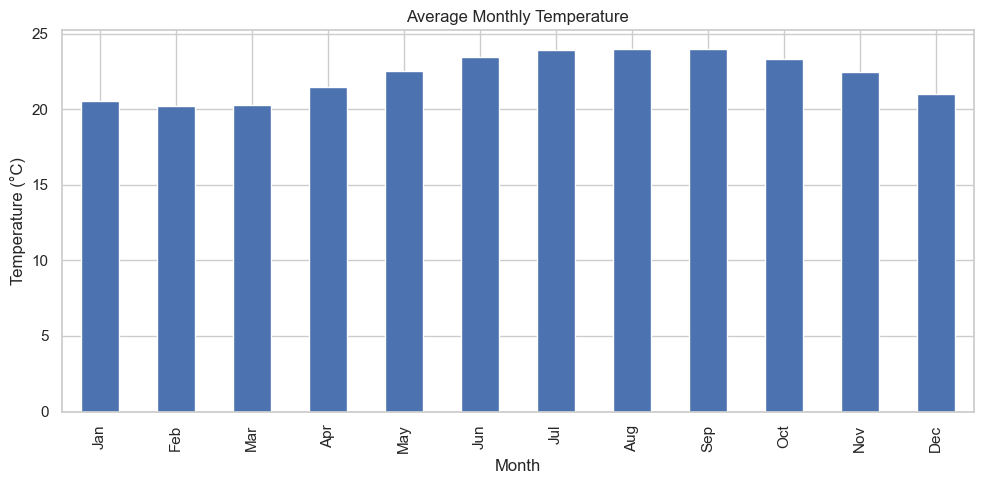

In [546]:
# Load the dataset
try:
    df = pd.read_csv('./weatherww2/SummaryofWeather.csv')
    print("Data loaded successfully!")
except Exception as e:
    print(f"Error loading data: {e}")
    print("Please download the dataset from Kaggle: https://www.kaggle.com/datasets/smid80/weatherww2")

# Filter for station ID 22508 (Honolulu, Hawaii)
station_id = 22508
hawaii_data = df[df['STA'] == station_id].copy()
print(f"Filtered data for station ID: {station_id} (Honolulu, Hawaii)")
print(f"Number of records: {len(hawaii_data)}")

# Convert date to datetime and sort
hawaii_data['Date'] = pd.to_datetime(hawaii_data['Date'])
hawaii_data = hawaii_data.sort_values('Date')

# Check for missing values in temperature columns
print("\nMissing values in temperature columns:")
print(hawaii_data[['MaxTemp', 'MinTemp', 'MeanTemp']].isnull().sum())

# Handle missing values in temperature columns
for col in ['MaxTemp', 'MinTemp', 'MeanTemp']:
    if hawaii_data[col].isnull().sum() > 0:
        hawaii_data[col] = hawaii_data[col].interpolate(method='time').ffill().bfill()

# Create day of year feature for seasonality
hawaii_data['DayOfYear'] = hawaii_data['Date'].dt.dayofyear
hawaii_data['Year'] = hawaii_data['Date'].dt.year
hawaii_data['Month'] = hawaii_data['Date'].dt.month

# Visualize temperature over time
plt.figure(figsize=(14, 6))
plt.plot(hawaii_data['Date'], hawaii_data['MeanTemp'], 'b-')
plt.title('Mean Temperature in Honolulu, Hawaii (1940-1945)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Explore seasonal patterns
monthly_avg = hawaii_data.groupby(hawaii_data['Date'].dt.month)['MeanTemp'].mean()

plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar')
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()



### 4.2 Apply regression models to weather data



Training data shape: (1461, 15)
Testing data shape: (731, 15)
Weather Temperature Prediction Model Results:
                                  Train MSE  Train RMSE  Train MAE  Train R²  \
Linear Regression                  1.222082    1.105478   0.853341  0.673758   
Ridge Regression                   1.223323    1.106039   0.853947  0.673427   
Lasso Regression                   1.232975    1.110394   0.856767  0.670850   
Polynomial Regression (degree=2)   1.033898    1.016808   0.777128  0.723995   

                                  Test MSE  Test RMSE  Test MAE   Test R²  
Linear Regression                 1.057734   1.028462  0.807201  0.522876  
Ridge Regression                  1.050033   1.024711  0.801903  0.526350  
Lasso Regression                  1.034814   1.017258  0.795527  0.533214  
Polynomial Regression (degree=2)  2.970422   1.723491  1.466202 -0.339903  


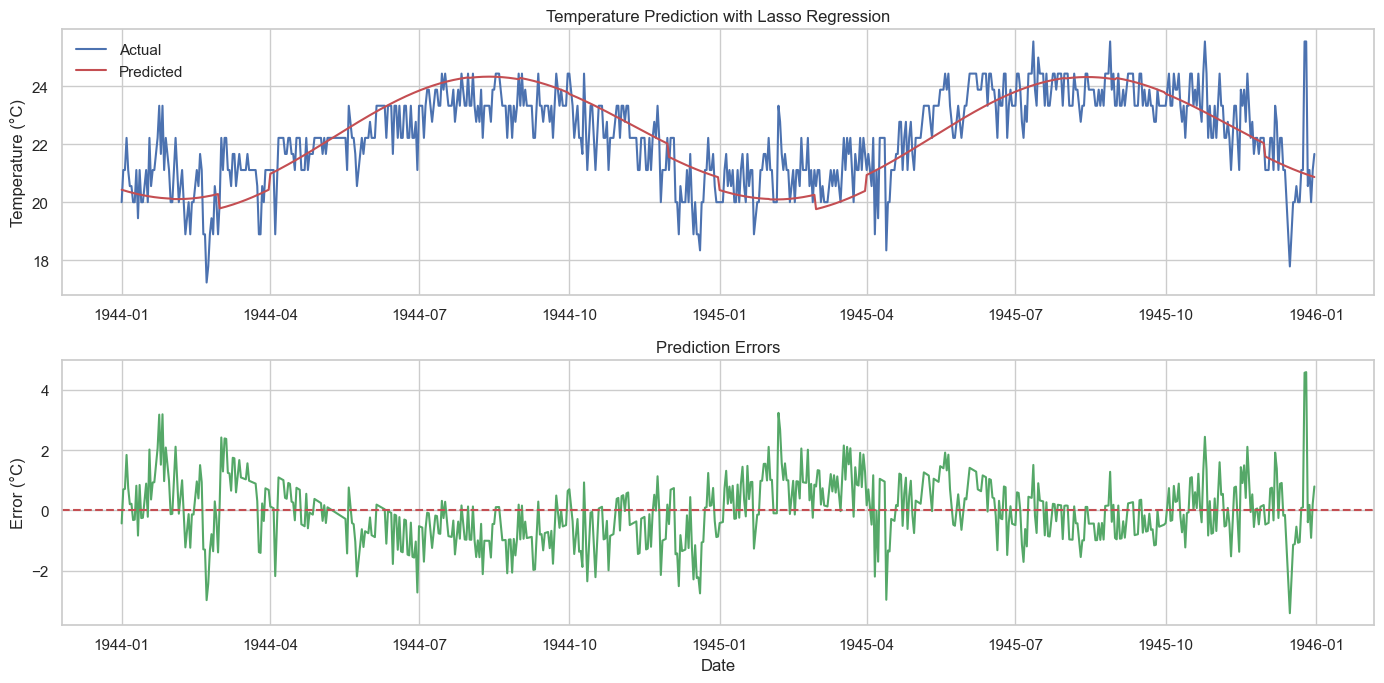

In [547]:
# Create features for temperature prediction
# We'll predict MeanTemp based on various features

# Create features for regression
features = hawaii_data[['DayOfYear', 'Year']].copy()
target = hawaii_data['MeanTemp']

# Add sine and cosine transformations for cyclical day of year
features['sin_day'] = np.sin(2 * np.pi * features['DayOfYear'] / 365)
features['cos_day'] = np.cos(2 * np.pi * features['DayOfYear'] / 365)

# Add one-hot encoding for month
month_dummies = pd.get_dummies(hawaii_data['Month'], prefix='month', drop_first=True)
features = pd.concat([features, month_dummies], axis=1)

# Split data into train and test sets (chronological split)
train_end_date = pd.Timestamp('1944-01-01')
train_mask = hawaii_data['Date'] < train_end_date

X_train_weather = features[train_mask]
y_train_weather = target[train_mask]
X_test_weather = features[~train_mask]
y_test_weather = target[~train_mask]

print(f"Training data shape: {X_train_weather.shape}")
print(f"Testing data shape: {X_test_weather.shape}")

# Apply regression models to weather data
def evaluate_weather_models(X_train, y_train, X_test, y_test):
    # Define models to test
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=0.01),
        'Polynomial Regression (degree=2)': make_pipeline(
            PolynomialFeatures(degree=2, include_bias=False),
            LinearRegression()
        )
    }
    
    # Evaluate each model
    results = {}
    
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate metrics
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        results[name] = {
            'Train MSE': train_mse,
            'Train RMSE': train_rmse,
            'Train MAE': train_mae,
            'Train R²': train_r2,
            'Test MSE': test_mse,
            'Test RMSE': test_rmse,
            'Test MAE': test_mae,
            'Test R²': test_r2,
            'Model': model,
            'Test Predictions': y_test_pred
        }
    
    # Create results DataFrame
    metrics = ['Train MSE', 'Train RMSE', 'Train MAE', 'Train R²', 
               'Test MSE', 'Test RMSE', 'Test MAE', 'Test R²']
    
    results_df = pd.DataFrame({
        name: {metric: results[name][metric] for metric in metrics}
        for name in models.keys()
    }).T
    
    return results_df, results

# Evaluate weather prediction models
results_df_weather, results_dict_weather = evaluate_weather_models(
    X_train_weather, y_train_weather, X_test_weather, y_test_weather
)

print("Weather Temperature Prediction Model Results:")
print(results_df_weather)

# Visualize predictions from the best model
best_model_name = results_df_weather['Test R²'].idxmax()
y_test_pred = results_dict_weather[best_model_name]['Test Predictions']

# Create a DataFrame with actual and predicted values
test_dates = hawaii_data.loc[~train_mask, 'Date'].reset_index(drop=True)
prediction_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': y_test_weather.values,
    'Predicted': y_test_pred
})

plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(prediction_df['Date'], prediction_df['Actual'], 'b-', label='Actual')
plt.plot(prediction_df['Date'], prediction_df['Predicted'], 'r-', label='Predicted')
plt.title(f'Temperature Prediction with {best_model_name}')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(prediction_df['Date'], prediction_df['Actual'] - prediction_df['Predicted'], 'g-')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Prediction Errors')
plt.xlabel('Date')
plt.ylabel('Error (°C)')
plt.grid(True)

plt.tight_layout()
plt.show()



## 5. Comparison and Conclusion



C:\Users\imadb\AppData\Local\Temp\ipykernel_18928\274007295.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x='Dataset', y='R² Score', data=summary_df, palette='viridis')
c:\Users\imadb\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\imadb\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group

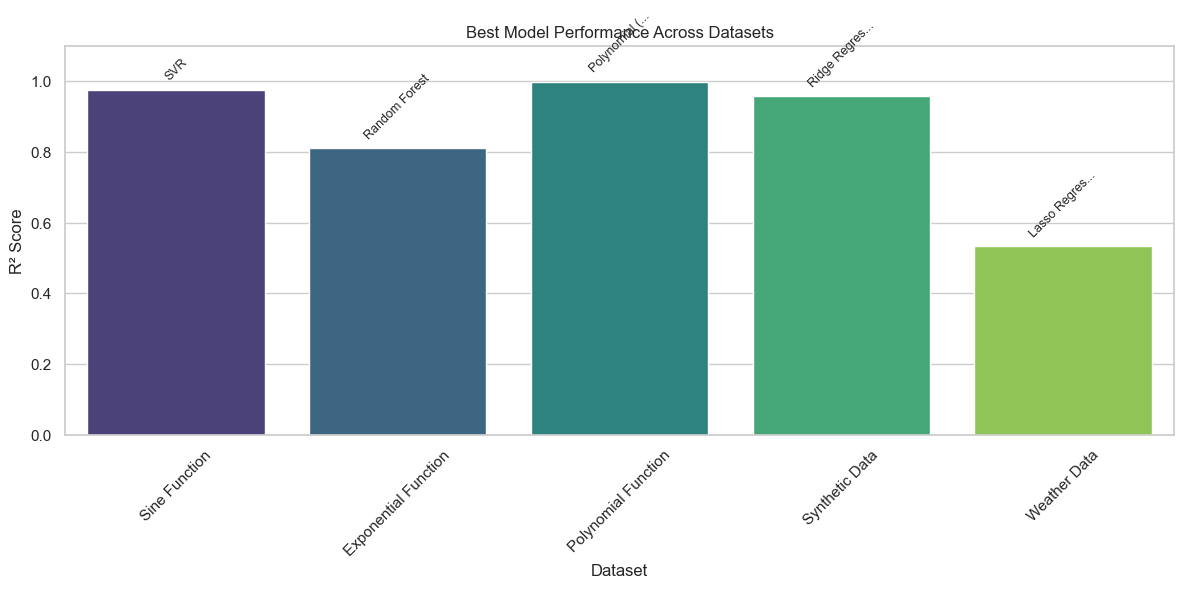

Summary of Best Models:
                Dataset                    Best Model  R² Score
0         Sine Function                           SVR  0.975696
1  Exponential Function                 Random Forest  0.810609
2   Polynomial Function         Polynomial (degree=3)  0.999942
3        Synthetic Data  Ridge Regression (alpha=1.0)  0.958105
4          Weather Data              Lasso Regression  0.533214

Project Conclusions:
1. For simple analytical functions like sine and exponential, polynomial models of appropriate degree perform best
2. For synthetic data with multiple features, linear and ridge regression models provide good performance
3. For weather data with seasonal patterns, models that capture cyclical patterns perform better
4. The key to successful regression modeling is understanding the underlying data patterns


In [548]:
# Compare the performance of models across different datasets
def compare_model_performance():
    # Create a summary table of best models for each dataset
    best_models = {
        'Sine Function': results_sin['R²'].idxmax(),
        'Exponential Function': results_exp['R²'].idxmax(),
        'Polynomial Function': results_poly['R²'].idxmax(),
        'Synthetic Data': results_synth['Test R²'].idxmax(),
        'Weather Data': results_df_weather['Test R²'].idxmax()
    }
    
    best_r2 = {
        'Sine Function': results_sin.loc[best_models['Sine Function'], 'R²'],
        'Exponential Function': results_exp.loc[best_models['Exponential Function'], 'R²'],
        'Polynomial Function': results_poly.loc[best_models['Polynomial Function'], 'R²'],
        'Synthetic Data': results_synth.loc[best_models['Synthetic Data'], 'Test R²'],
        'Weather Data': results_df_weather.loc[best_models['Weather Data'], 'Test R²']
    }
    
    summary_df = pd.DataFrame({
        'Dataset': list(best_models.keys()),
        'Best Model': list(best_models.values()),
        'R² Score': list(best_r2.values())
    })
    
    # Visualize results
    plt.figure(figsize=(12, 6))
    g = sns.barplot(x='Dataset', y='R² Score', data=summary_df, palette='viridis')
    
    # Add model names on top of bars
    for i, (model, score) in enumerate(zip(best_models.values(), best_r2.values())):
        model_name = model if len(model) < 15 else model[:12] + '...'
        g.text(i, score + 0.02, model_name, ha='center', va='bottom', rotation=45, fontsize=9)
    
    plt.title('Best Model Performance Across Datasets')
    plt.ylim(0, 1.1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return summary_df

summary = compare_model_performance()
print("Summary of Best Models:")
print(summary)

# Final conclusions
print("\nProject Conclusions:")
print("1. For simple analytical functions like sine and exponential, polynomial models of appropriate degree perform best")
print("2. For synthetic data with multiple features, linear and ridge regression models provide good performance")
print("3. For weather data with seasonal patterns, models that capture cyclical patterns perform better")
print("4. The key to successful regression modeling is understanding the underlying data patterns")



Similar code found with 1 license type